In [1]:
from keras import models

Using TensorFlow backend.


In [2]:
from keras.models import load_model
import cv2
import numpy as np
from keras.optimizers import SGD


In [9]:
from keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
                 include_top = False,
                 input_shape = (299, 299, 3))

87916544/87910968 [==============================] - 342s 4us/step


In [13]:
from keras.layers import Dropout, Flatten, Dense
from keras import layers

In [14]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(rate=1- 0.8))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(rate = 1-0.8))
model.add(layers.Dense(8, activation = 'sigmoid'))
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

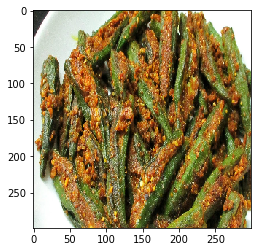

In [70]:


model.load_weights('my_model_weights.h5')



img = cv2.imread('11.jpg')
img = cv2.resize(img,(299,299))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB ) 

plt.imshow(img, interpolation='nearest')
plt.show()





In [29]:
import matplotlib.pyplot as plt

In [71]:
data = cv2.imread('11.jpg')
data = cv2.resize(data,(299,299))

data =  np.reshape(data,[1,299,299,3])
data = np.array(data, dtype="float") / 255.0

In [72]:
np.argmax(model.predict(data))

1

In [73]:
get_key(np.argmax(model.predict(data)))

'bhindi_bharwa'

In [55]:
def get_key(val): 
    for key, value in labels.items(): 
         if val == value: 
            return key 

In [52]:

labels = {'baigan ka bharta':0, 'bhindi_bharwa':1, 'gravy_chicken':2, 'kala_chana_sabji':3, 'maggi_street_food':4,'matar_aloo':5,
         'pasta':6, 'tandoori chicken':7}
